In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [47]:
df_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [48]:
#1st we have to combine both test and train dataset taaki hum dono pe saath me data preprocessing kar paae 
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [49]:
df=df_train.append(df_test)

In [50]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [51]:
df.info()
#to be noted that age is given as object coz its given as a range 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [52]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [53]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [54]:
#which column is just waste 
#in this case user id is useless
df.drop(['User_ID'],axis=1,inplace=True)

In [55]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [56]:
# now we need to convert these categorical variables into computer understantable stuff
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [57]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,0,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,0,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,0,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [31]:
#alternate way 
#wahan ye 0,1 isliye aarha hai coz a;ready m,f ko 0,1  me change kardiya hai agar wo ni kia hota to abi M,F hi aata 
# pd.get_dummies(df['Gender'])

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,1,0


In [32]:
# pd.get_dummies(df['Gender'],drop_first=1)
#aese karne se 1st wala column drop ho jaega


,1
0,0
1,0
2,0
3,0
4,1
...,...
233594,0
233595,0
233596,0
233597,0


In [33]:
#now we can replace it with gender 
# df['Gender']=pd.get_dummies(df['Gender'],drop_first=1)

In [58]:
#now handle categorical feature age
df['Age'].unique()
#this way we can see how many unique values are there in age


array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [38]:
# we can use the get dummies thingy
# pd.get_dummies(df['Age'])
# and then we can add these columns and drop the original age column

,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
233594,0,0,1,0,0,0,0
233595,0,0,1,0,0,0,0
233596,0,0,1,0,0,0,0
233597,0,0,0,0,1,0,0


In [59]:
# but instead of doing the above thing we use common sense 0-17 ke to kids hai to wo kam he shopping karnege and 18-24 and 26-35 
# hi major shopping karenge to if we assign 0-17 value like 0 then in lo we assign values like 4,5 taakie model inko zyda value de
# this is also called target guiding
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [60]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN


In [ ]:
#we can also do lable encoding 
# Import label encoder
# from sklearn import preprocessing
  
# # label_encoder object knows how to understand word labels.
# label_encoder = preprocessing.LabelEncoder()
  
# # Encode labels in column 'species'.
# df['Age']= label_encoder.fit_transform(df['Age'])
  
# df['Age'].unique()
#google it since i am not sure ue ne vid me kya bola 


In [ ]:
# ##fixing categorical City_categort
# df_city=pd.get_dummies(df['City_Category'],drop_first=True)
# df_city.head()
#we did the drop_first=True coz b and c are enough themselves apan ko a alag se rakh ne ki need ni hai

In [ ]:
# df=pd.concat([df,df_city],axis=1)
# df.head()

In [ ]:
# df.drop('City_Category',axis=1,inplace=True)
# df.head()
#either use dummies or just use the usual mapping 

In [62]:
df['City_Category']=df['City_Category'].map({'A':1,'B':2,'C':3})

In [63]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,3,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,2,4+,1,8,NaN,NaN,NaN
233595,P00254642,0,3,15,2,4+,1,5,8.0,NaN,NaN
233596,P00031842,0,3,15,2,4+,1,1,5.0,12.0,NaN
233597,P00124742,0,5,1,3,4+,0,10,16.0,NaN,NaN


In [64]:
#now deal with missing values
df.isnull().sum()
#purcahse wise null valuesare there coz its test data and it should be null 
#the problem is with product categroy 


Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [66]:
df['Product_Category_2'].unique()
#now as we can see its a discrete feature 
#and for categorical features the best way to replace values is mode

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [70]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [71]:
df['Product_Category_2'].mode()
#and here we get the mode now we need to select the value 8 

0    8.0
dtype: float64

In [72]:
df['Product_Category_2'].mode()[0]

8.0

In [75]:
#time to fill the nan values
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])


In [76]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,3,4+,0,8,8.0,16.0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,2,4+,1,8,8.0,16.0,NaN
233595,P00254642,0,3,15,2,4+,1,5,8.0,16.0,NaN
233596,P00031842,0,3,15,2,4+,1,1,5.0,12.0,NaN
233597,P00124742,0,5,1,3,4+,0,10,16.0,16.0,NaN


In [77]:
df['Product_Category_2']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
#now for category 3

In [78]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,16.0,16.0,8370.0
1,P00248942,0,1,10,1,2,0,1,14.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,16.0,16.0,1422.0
3,P00085442,0,1,10,1,2,0,12,16.0,16.0,1057.0
4,P00285442,1,7,16,3,4+,0,8,16.0,16.0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,2,4+,1,8,16.0,16.0,NaN
233595,P00254642,0,3,15,2,4+,1,5,16.0,16.0,NaN
233596,P00031842,0,3,15,2,4+,1,1,12.0,12.0,NaN
233597,P00124742,0,5,1,3,4+,0,10,16.0,16.0,NaN


In [79]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [80]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [86]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\asus\AppData\Local\Temp/ipykernel_20428/2063355665.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 71.7+ MB


In [88]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,16.0,16.0,8370.0
1,P00248942,0,1,10,1,2,0,1,14.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,16.0,16.0,1422.0
3,P00085442,0,1,10,1,2,0,12,16.0,16.0,1057.0
4,P00285442,1,7,16,3,4,0,8,16.0,16.0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,2,4,1,8,16.0,16.0,NaN
233595,P00254642,0,3,15,2,4,1,5,16.0,16.0,NaN
233596,P00031842,0,3,15,2,4,1,1,12.0,12.0,NaN
233597,P00124742,0,5,1,3,4,0,10,16.0,16.0,NaN


In [89]:
#now we can see Stay_In_Current_City_Years is object and we need to convert it in integers 
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int32  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int32(1), int64(6), object(1)
memory usage: 68.8+ MB


ValueError: cannot reindex from a duplicate axis

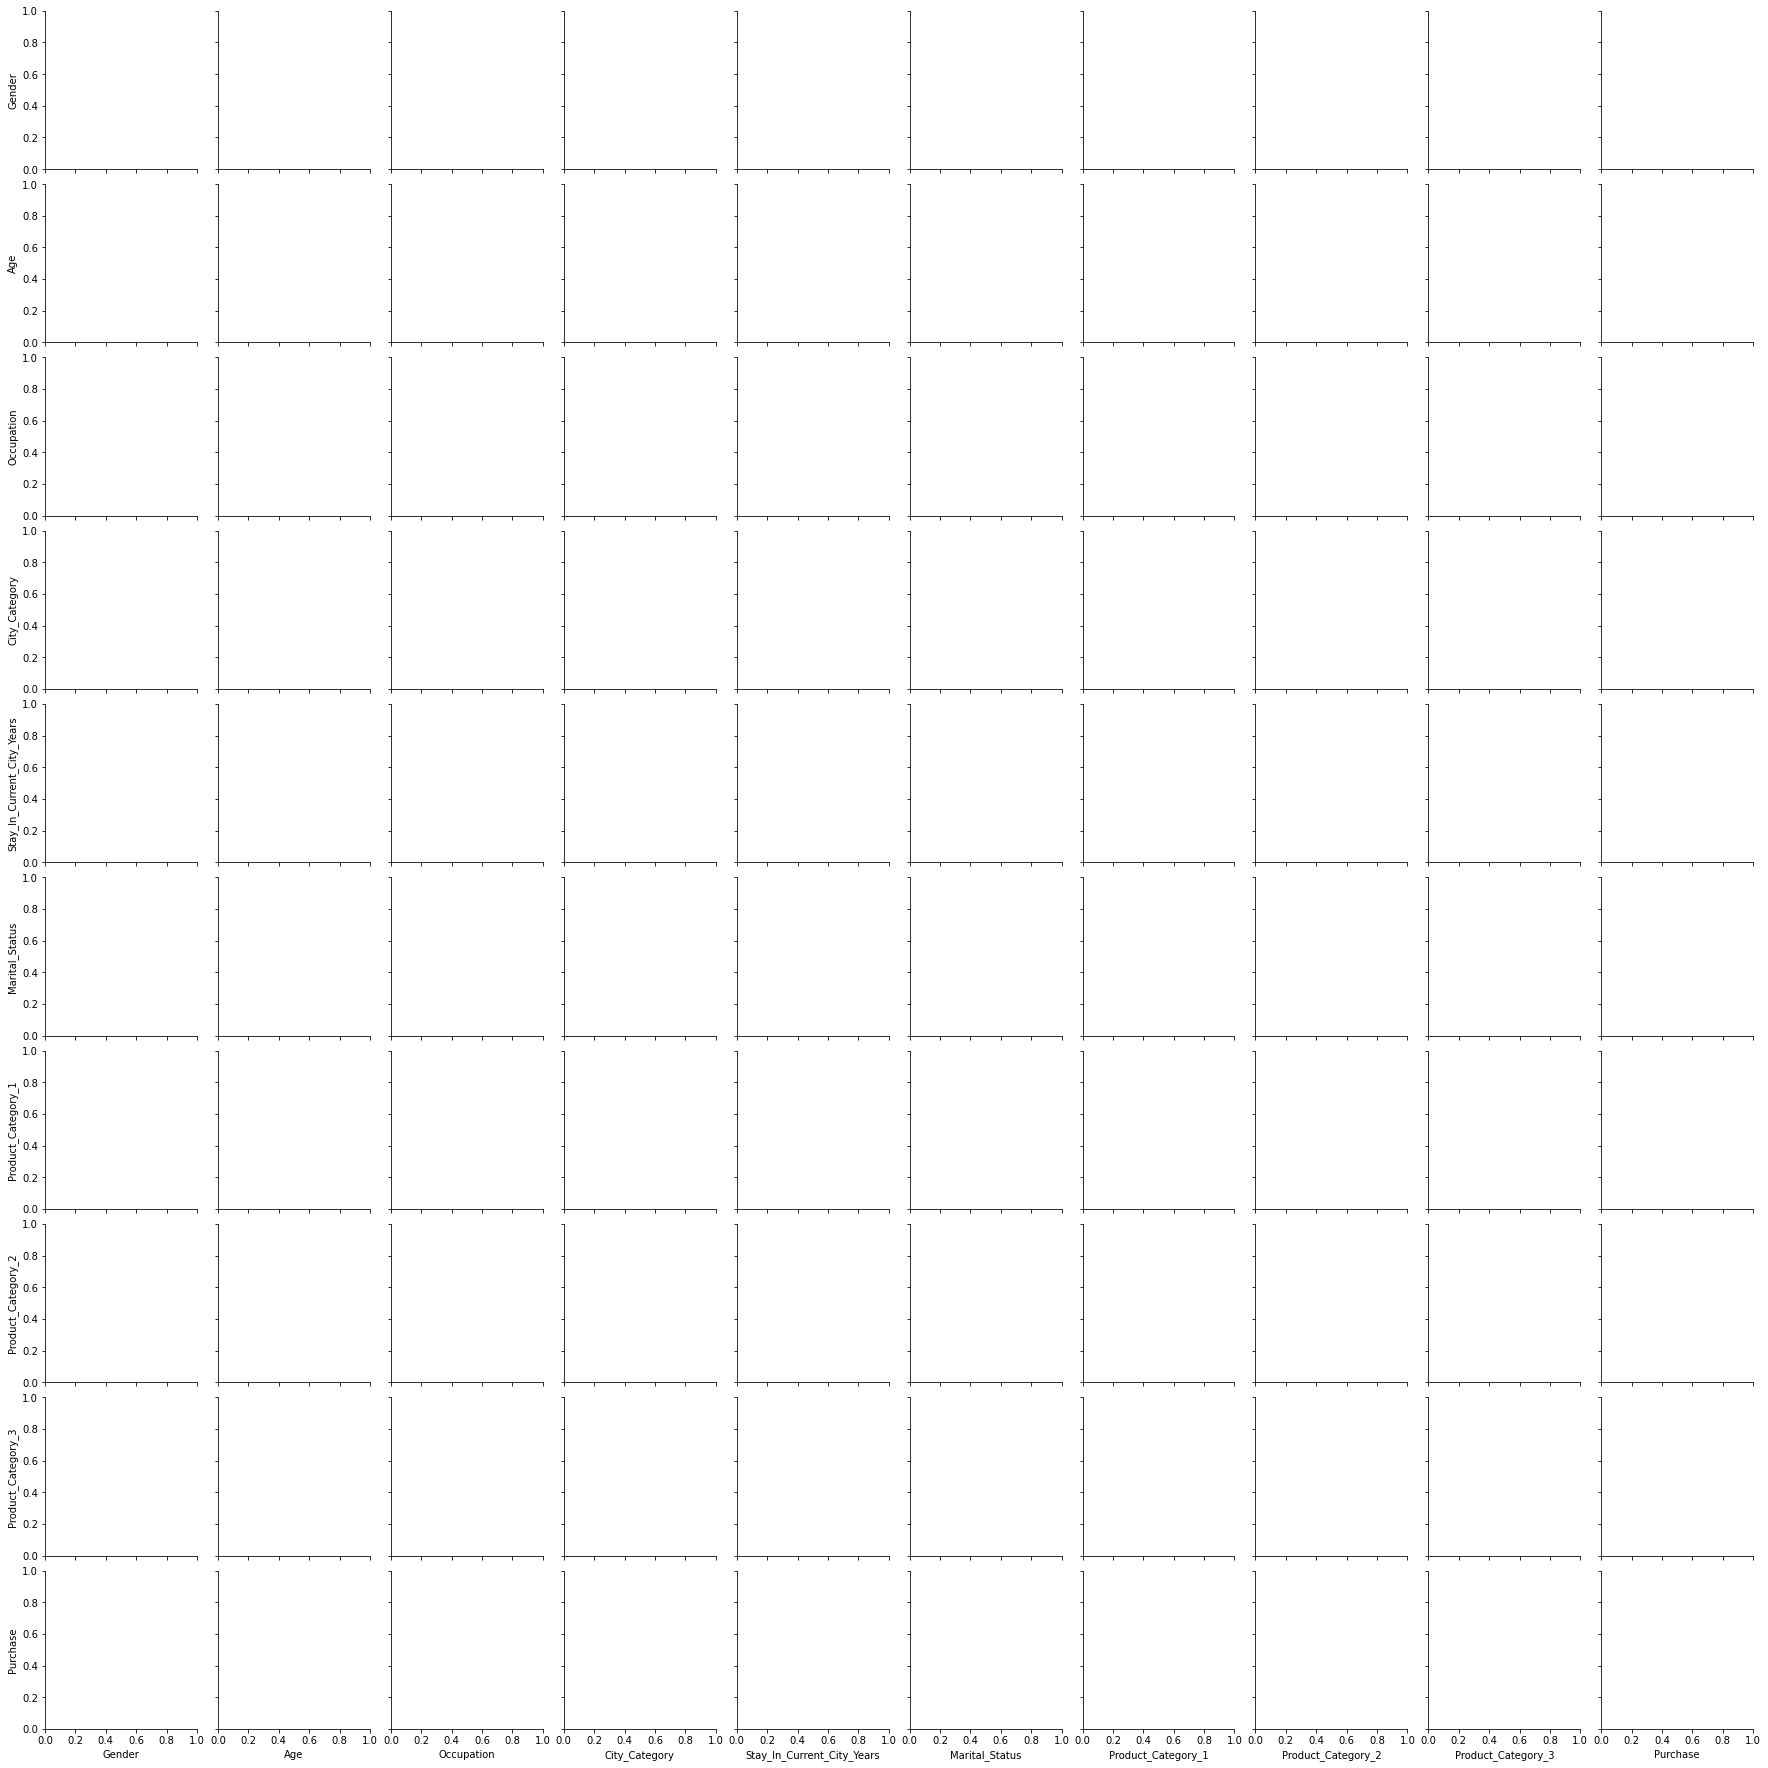

In [91]:
#visualization
sns.pairplot(df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

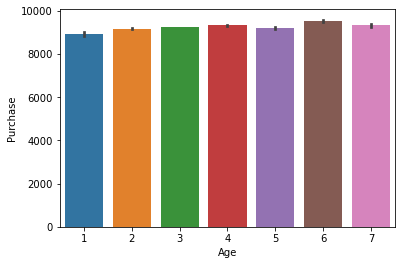

In [92]:
sns.barplot('Age','Purchase',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

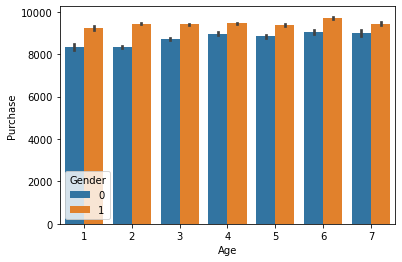

In [93]:
#now seprate using gender
sns.barplot('Age','Purchase',hue='Gender',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

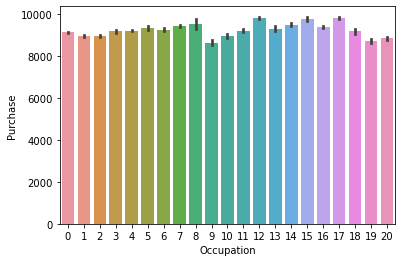

In [94]:
sns.barplot('Occupation','Purchase',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

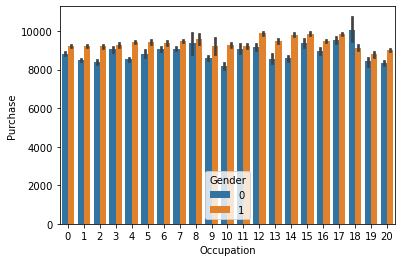

In [95]:
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

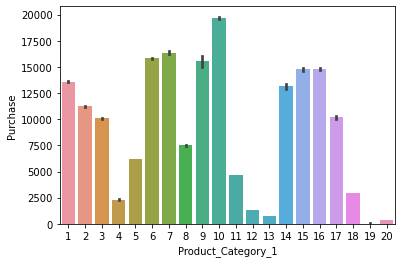

In [98]:
sns.barplot('Product_Category_1','Purchase',data=df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

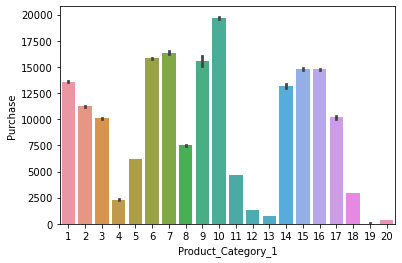

In [97]:
sns.barplot('Product_Category_1','Purchase',data=df)

In [99]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

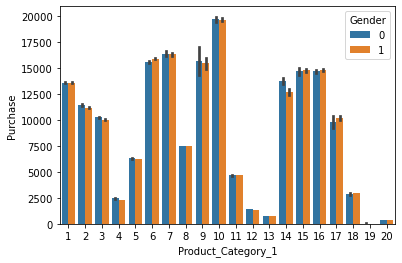

In [100]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)
#hue ki wajah se basically segregations ban jaate hai like if hue = gender hai to 0-17 ki catrogyr me 2 segregation ho jaegnge on basis of gender

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

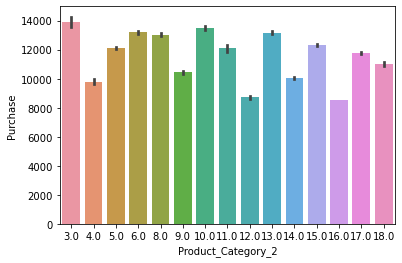

In [101]:
sns.barplot('Product_Category_2','Purchase',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

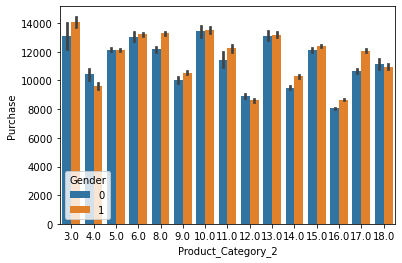

In [102]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

In [103]:
df_test=df[df['Purchase'].isnull()]

In [104]:
df_test

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,1,5,7,2,2,1,1,16.0,16.0,NaN
1,P00113442,1,3,17,3,0,0,3,16.0,16.0,NaN
2,P00288442,0,4,1,2,4,1,5,16.0,16.0,NaN
3,P00145342,0,4,1,2,4,1,4,16.0,16.0,NaN
4,P00053842,0,3,1,3,1,0,4,12.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,2,4,1,8,16.0,16.0,NaN
233595,P00254642,0,3,15,2,4,1,5,16.0,16.0,NaN
233596,P00031842,0,3,15,2,4,1,1,12.0,12.0,NaN
233597,P00124742,0,5,1,3,4,0,10,16.0,16.0,NaN


In [105]:
df_train=df[~df['Purchase'].isnull()]

In [106]:
df_train

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,16.0,16.0,8370.0
1,P00248942,0,1,10,1,2,0,1,14.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,16.0,16.0,1422.0
3,P00085442,0,1,10,1,2,0,12,16.0,16.0,1057.0
4,P00285442,1,7,16,3,4,0,8,16.0,16.0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,6,13,2,1,1,20,16.0,16.0,368.0
550064,P00375436,0,3,1,3,3,0,20,16.0,16.0,371.0
550065,P00375436,0,3,15,2,4,1,20,16.0,16.0,137.0
550066,P00375436,0,7,1,3,2,0,20,16.0,16.0,365.0


In [124]:
#we split it in train and test data 
X=df_train.drop('Purchase', axis=1)

In [125]:
X

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,P00069042,0,1,10,1,2,0,3,16.0,16.0
1,P00248942,0,1,10,1,2,0,1,14.0,14.0
2,P00087842,0,1,10,1,2,0,12,16.0,16.0
3,P00085442,0,1,10,1,2,0,12,16.0,16.0
4,P00285442,1,7,16,3,4,0,8,16.0,16.0
...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,6,13,2,1,1,20,16.0,16.0
550064,P00375436,0,3,1,3,3,0,20,16.0,16.0
550065,P00375436,0,3,15,2,4,1,20,16.0,16.0
550066,P00375436,0,7,1,3,2,0,20,16.0,16.0


In [122]:
y=df_train['Purchase']

In [123]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [127]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [128]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
